In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-06-02 16:27:59.342194: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 16:27:59.362592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.config.experimental.list_physical_devices()

2023-06-02 16:28:24.956071: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:28:24.972804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:28:24.972871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
# checking images shape
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
# display single image shape
X_train[0].shape

(32, 32, 3)

In [7]:
# checking labels
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# scaling image values between 0-1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [9]:
# one hot encoding labels
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [10]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [11]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

2023-06-02 16:28:39.672788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:28:39.673081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:28:39.673245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-06-02 16:28:41.268427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-02 16:28:41.307760: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x563edfad09b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 16:28:41.307826: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-06-02 16:28:42.069193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-06-02 16:28:43.435100: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 5s 1ms/step - loss: 1.8113 - accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6228 - accuracy: 0.4277
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5427 - accuracy: 0.4558
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4830 - accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4323 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3879 - accuracy: 0.5129
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3511 - accuracy: 0.5266
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3161 - accuracy: 0.5391
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2827 - accuracy: 0.5508
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2544 - accurac

In [12]:
%%timeit -n1 -r1
# CPU
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10
  10/1563 [..............................] - ETA: 18s - loss: 2.4016 - accuracy: 0.0812 

2023-06-02 16:29:30.081985: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x563ee1b1a1c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-06-02 16:29:30.082152: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version


1563/1563 [==============================] - 15s 9ms/step - loss: 1.8131 - accuracy: 0.3545
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6218 - accuracy: 0.4284
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5385 - accuracy: 0.4583
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4788 - accuracy: 0.4793
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4323 - accuracy: 0.4934
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3881 - accuracy: 0.5125
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3493 - accuracy: 0.5270
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3190 - accuracy: 0.5351
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2833 - accuracy: 0.5494
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2572

In [13]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8200 - accuracy: 0.3524
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6278 - accuracy: 0.4238
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5448 - accuracy: 0.4556
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4852 - accuracy: 0.4762
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4348 - accuracy: 0.4953
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3912 - accuracy: 0.5117
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3564 - accuracy: 0.5215
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3184 - accuracy: 0.5365
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2894 - accuracy: 0.5462
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [14]:
# loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
# checking shape

print(train_images.shape)

print(train_labels[0])

(60000, 28, 28)
9


'Ankle boot'

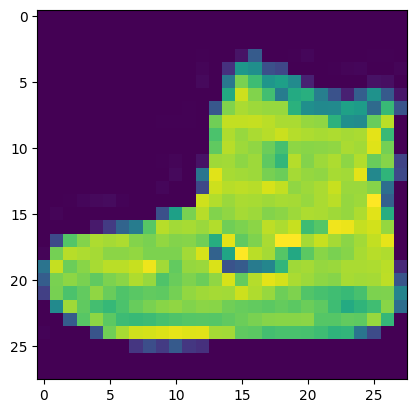

In [16]:
# checking images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[0])
class_names[train_labels[0]]

In [17]:
# scaling
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [18]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    model = keras.Sequential(layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(hidden_layers=5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=15)

Epoch 1/15
  21/1875 [..............................] - ETA: 4s - loss: 1.4557 - accuracy: 0.4405   

2023-06-02 16:34:41.416927: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5186 - accuracy: 0.8114
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.8578
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8728
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8810
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8868
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8924
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8969
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.8997
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.9029
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accurac

In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 780us/step - loss: 0.5136 - accuracy: 0.8145
Epoch 2/15
1875/1875 [==============================] - 2s 828us/step - loss: 0.3903 - accuracy: 0.8597
Epoch 3/15
1875/1875 [==============================] - 2s 805us/step - loss: 0.3503 - accuracy: 0.8738
Epoch 4/15
1875/1875 [==============================] - 1s 798us/step - loss: 0.3282 - accuracy: 0.8805
Epoch 5/15
1875/1875 [==============================] - 2s 801us/step - loss: 0.3081 - accuracy: 0.8884
Epoch 6/15
1875/1875 [==============================] - 2s 800us/step - loss: 0.2950 - accuracy: 0.8920
Epoch 7/15
1875/1875 [==============================] - 2s 811us/step - loss: 0.2829 - accuracy: 0.8959
Epoch 8/15
1875/1875 [==============================] - 1s 777us/step - loss: 0.2722 - accuracy: 0.9006
Epoch 9/15
1875/1875 [==============================] - 1s 788us/step - loss: 0.2635 - accuracy: 0.9023
Epoch 10/15
1875/1875 [==============================] - 1s 794u

In [21]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=300)

Epoch 1/300
1875/1875 [==============================] - 2s 744us/step - loss: 0.5120 - accuracy: 0.8152
Epoch 2/300
1875/1875 [==============================] - 1s 768us/step - loss: 0.3911 - accuracy: 0.8596
Epoch 3/300
1875/1875 [==============================] - 2s 992us/step - loss: 0.3524 - accuracy: 0.8736
Epoch 4/300
1875/1875 [==============================] - 2s 930us/step - loss: 0.3264 - accuracy: 0.8819
Epoch 5/300
1875/1875 [==============================] - 1s 768us/step - loss: 0.3128 - accuracy: 0.8867
Epoch 6/300
1875/1875 [==============================] - 1s 778us/step - loss: 0.2934 - accuracy: 0.8940
Epoch 7/300
1875/1875 [==============================] - 1s 757us/step - loss: 0.2805 - accuracy: 0.8975
Epoch 8/300
1875/1875 [==============================] - 1s 785us/step - loss: 0.2720 - accuracy: 0.8996
Epoch 9/300
1875/1875 [==============================] - 1s 772us/step - loss: 0.2598 - accuracy: 0.9038
Epoch 10/300
1875/1875 [==============================]